### PCA 시각화 예제

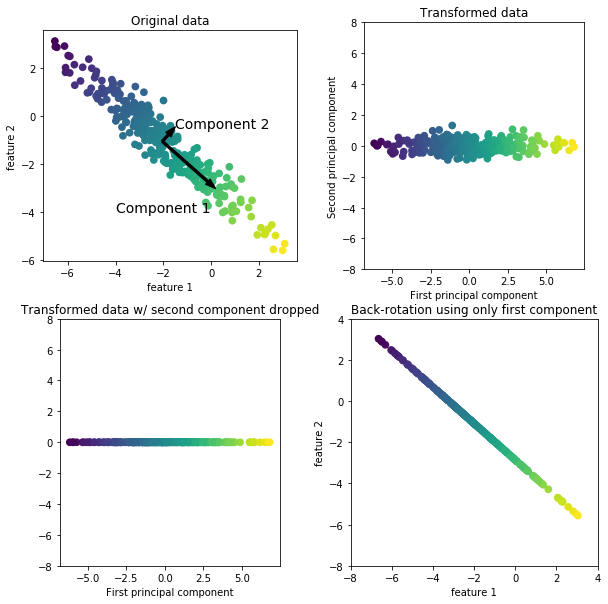

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_pca_illustration():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Original data")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[0].set_xlabel("feature 1")
    axes[0].set_ylabel("feature 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.5, -.5, "Component 2", size=14)
    axes[0].text(-4, -4, "Component 1", size=14)
    axes[0].set_aspect('equal')
    ###############
    axes[1].set_title("Transformed data")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes[1].set_xlabel("First principal component")
    axes[1].set_ylabel("Second principal component")
    axes[1].set_aspect('equal')
    axes[1].set_ylim(-8, 8)
    ###############
    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes[2].set_title("Transformed data w/ second component dropped")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("First principal component")
    axes[2].set_aspect('equal')
    axes[2].set_ylim(-8, 8)
    ###############
    axes[3].set_title("Back-rotation using only first component")
    axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("feature 1")
    axes[3].set_ylabel("feature 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)
    plt.show()
    
plot_pca_illustration()    